# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [1]:
# you are free to use any package you deem fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Dataset

In [2]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

In [3]:
X.shape, Y.shape

((500, 2), (500,))

In [4]:
pd.DataFrame(X)

,0,1
0,1.569404,-0.133388
1,0.496307,0.443235
2,1.783240,-0.230247
3,0.551058,-0.037493
4,0.257809,0.583334
...,...,...
495,0.118067,0.181018
496,1.170904,-0.826999
497,1.084024,0.024586
498,1.542110,-0.238542


In [5]:
pd.DataFrame(Y)[0].unique()

array([1, 0])

Text(0.5, 0, 'Y')

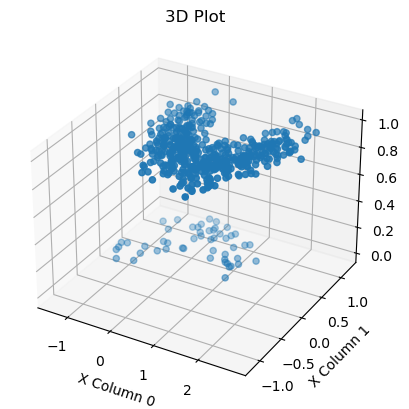

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
ax.set_title("3D Plot")
ax.set_xlabel('X Column 0')
ax.set_ylabel('X Column 1')
ax.set_zlabel('Y')

Text(0, 0.5, 'Y')

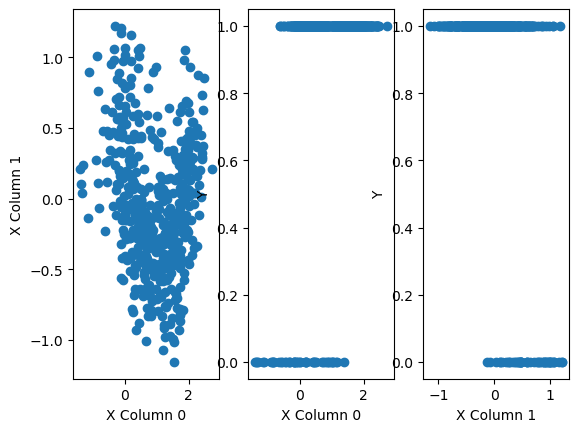

In [7]:
plt.subplot(1,3,1)
plt.scatter(X[:,0],X[:,1])
plt.xlabel('X Column 0')
plt.ylabel('X Column 1')
plt.subplot(1,3,2)
plt.scatter(X[:,0],Y)
plt.xlabel('X Column 0')
plt.ylabel('Y')
plt.subplot(1,3,3)
plt.scatter(X[:,1],Y)
plt.xlabel('X Column 1')
plt.ylabel('Y')

## Training

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

In [9]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [10]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [11]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

## Testing / Optimization

In [12]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print()
    print(algo)
    print(metrics.classification_report(yhat,y_test))


lr
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.99      0.98      0.98        91

    accuracy                           0.97       100
   macro avg       0.89      0.93      0.91       100
weighted avg       0.97      0.97      0.97       100


rc
              precision    recall  f1-score   support

           0       0.20      1.00      0.33         2
           1       1.00      0.92      0.96        98

    accuracy                           0.92       100
   macro avg       0.60      0.96      0.65       100
weighted avg       0.98      0.92      0.94       100


rf
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.97      0.99      0.98        88

    accuracy                           0.96       100
   macro avg       0.93      0.87      0.90       100
weighted avg       0.96      0.96      0.96       100


gb
   

## Performance Analysis

Compared to 1, all the algorithms struggled with predicting 0 accurately. But overall, the gradient boosting classifier performed the best with an overall accuracy of 0.97.